<font size='5' color='#afafaf'>NAC 01 - Adult.csv</font><br>

---
<br>
Notebook referente ao desenvolvimento da <b>NAC 01</b> de Inteligência Artificial e computacional. 
<br>Utilizaremos a csv: 'Adult.csv'.
Para sabermos mais sobre o csv deveremos utilizar o seguinte link para informações: <a href='https://archive.ics.uci.edu/ml/datasets/Adult'>Adult.csv more info</a>
<br>Necessário desenvolvermos: 
<li>Análise exploratória dos dados --> Responder três questões semânticas sobre a distribuição dos dados em relação ao objetivo de análise traçado;
<li>Construir no notebook a Analise;
<li>Construir uma apresentação sobre o trabalho.
<br><br>Notebook construído pelos alunos:

*   Caio Eguchi Nilson - 81122
*   Erick Rozendo Santana Silva - 81508    
*   Filipe Lacerda Santos - 81478
*   João Vitor de Oliveira Costa - 81683



# Introdução e configurando ambiente.

Para o desenvolvimento desse notebook utilizamos o Google Colabs, uma plataforma da google para a criação de notebook. Ele possui características muito parecidas com o Jupyter Notebook, mas a praticidade de utilizar serviços do google e uma maior simplicidade, nos fez optar por utilizar o Colabs.<br><br>Em teoria, todos os códigos rodados aqui deverão rodar em outra plataforma, mas caso aconteça algum tipo de problema, por favor, entrar em contato.

Primeiramente iremos adicionar as bibliotecas que estamos considerando utilizar.

In [0]:
# Adicionando as bibliotecas pandas e numpy, para nos auxiliar com as listas.
import pandas as pd
import numpy as np

Para montarmos o google drive é bastante simples:

*   Primeiro precisamos rodar o bloco de código abaixo.
*   Logo após isso, clicamos no link que irá aparecer e fazemos logon em uma conta google e permitimos que o google drive seja acessado.
*   Depois receberemos um código e iremos colocar no campo requerido.

Pronto. Já podemos usar qualquer arquivo que esteja no drive da pessoa logada.

In [0]:
# Montando o google drive, para lermos a CSV.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Lendo a csv, após montar os diretórios do google drive.
# Observa-se o uso da biblioteca pandas quando utilizamos o alias pd.
# Como estamos utilizando o google drive, o diretorio fica da seguinte maneira:
# 'drive/My Drive/' <- padrão 'PastaDoArquivo/Arquivo.csv' <- restante do diretorio
# Para a utiização desse notebook, lembre-se de alterar o caminho no código abaixo e de baixar o csv no segundo link abaixo.

data = pd.read_csv("drive/My Drive/BOBOS/data/adult2.csv")

Fazendo uma leitura inicial do csv proposto observamos que ele não possuia os titulos corretos. Por isso editamos e criamos o 'adult2.csv' com os titulos concertados de acordo com o [site.](https://archive.ics.uci.edu/ml/datasets/Adult)
<br><br>Para fazer o download do csv que será utilizado na contrução desse notebook [clique aqui.](https://drive.google.com/file/d/1dPY2C7gpRP0RxHNWwG_y8JLW40f0E9FL/view?usp=sharing)



In [0]:
# Começo de nossa analise, lendo as 10 primeiras linhas de nosso dataframe.
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,-
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Agora lendo as ultimas 10 linhas
data.tail(10)


,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,-
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [0]:
# Dando mais uma olhada inicial no nosso csv, pedindo para que nos mostre 5 linhas aleatórias de nosso dataframe.
data.sample(5)

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,-
2129,47,State-gov,30575,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
4960,17,Local-gov,246308,11th,7,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,Puerto-Rico,<=50K
25899,50,Private,169646,Bachelors,13,Separated,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
23322,23,Private,391171,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,25,United-States,<=50K
8925,25,Private,135568,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [0]:
# Descobrindo a quantidade de linhas e de colunas do nosso dataframe.
data.shape

(32561, 15)

In [0]:
# Descobrindo as colunas de nosso dataframe
data.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       ' -'],
      dtype='object')

In [0]:
# Descobrindo informações mais técnicas do nosso dataframe, como por exemplo o tipo da váriavel de cada coluna.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14   -              32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Fim da Introdução e configuração de nossas bibliotecas e dataframes.
<br>A partir da proxima sessão, já poderemos por a mão na massa e começar a analisar o dataframe proposto.

# Desenvolvimento

A partir das proximas sessões exploraremos mais as possibilidades do nosso dataframe e desenvolveremos as questões semânticas.

## 1ª Questão semântica: Qual sexo ganha mais, segundo esse dataframe?

Segundo diversas matérias¹, as mulheres mesmo com maior grau de escolaridade, e atuando no mesmo cargo, ainda sim ganham menos que os homens. E a questão que queremos responder é se no dataframe isso se repete.
<br>Lembrando que, esse dataframe foi feito no ano de 1994 por Barry Becker, e a intenção da pesquisa foi descobrir se uma pessoa ganha mais de 50 mil dolares por ano. Essas informações você consegue encontrar [aqui.](https://archive.ics.uci.edu/ml/datasets/Adult)




<br>
¹ Os links para essas matérias você poderá encontrar na sessão Bibliografia.

Trazendo o resultado de todas as mulheres, para ter uma noção mais clara da análise.

In [0]:
data.loc[((data.Sex == " Female")), ["Age", "Sex", " -"]]

,Age,Sex,-
4,28,Female,<=50K
5,37,Female,<=50K
6,49,Female,<=50K
8,31,Female,>50K
12,23,Female,<=50K
...,...,...,...
32546,37,Female,<=50K
32549,43,Female,<=50K
32556,27,Female,<=50K
32558,58,Female,<=50K


Os códigos abaixo tem o seguinte objetivo:

1.   Criar uma máscara, selecionando apenas os dados que possuem o campo Sex igual a Female, ou seja, ele seleciona todas as mulheres;

```
mascara1 = (data.Sex == " Female")
```

2.   Criar um dataframe apenas com as mulheres;

```
mulheres = data.loc[mascara1, :]
```

3.   Descobrir quantas mulheres possuem na pesquisa.

```
qtd_mulheres = mulheres.shape[0]
qtd_mulheres
```

In [0]:
mascara1 = (data.Sex == " Female")
mulheres = data.loc[mascara1, :]
qtd_mulheres = mulheres.shape[0]
qtd_mulheres

10771

Dessa maneira, descobrimos que possuimos **10771** mulheres no nosso dataframe.


---

Agora, vamos analisar a faixa salarial anual das mulheres.

O objetivo dos codigos abaixo são:

1.   Criar uma máscara, selecionando apenas os dados que possuem o campo Sex igual a Female e o Salario Anual acima de 50k, ou seja, ele seleciona todas as mulheres que recebem acima de 50 mil.

```
mascara2 = (data.Sex == " Female")&(data[" -"] == " >50K")
```


2.   Criando um dataframe com os resultados obtidos:

```
mulheres_maior_50k = data.loc[mascara2, :]
```

3. Exibir os resultados obtidos:

```
qtd_mulheres_maior = mulheres_maior_50k.shape[0]
qtd_mulheres_maior
```


In [0]:
mascara2 = (data.Sex == " Female")&(data[" -"] == " >50K")
mulheres_maior_50k = data.loc[mascara2, :]
qtd_mulheres_maior = mulheres_maior_50k.shape[0]
qtd_mulheres_maior

1179

Dessa maneira, descobrimos que possuimos **1179** mulheres no nosso dataframe que recebem acima de 50 mil por ano.


---


Agora iremos realizar a mesma consulta que fizemos acima, porém, retornando o número de mulheres que recebem abaixo de 50 mil por ano:

In [0]:
mascara3 = (data.Sex == " Female")&(data[" -"] == " <=50K")
mulheres_menor_50k = data.loc[mascara3, :]
qtd_mulheres_menor = mulheres_menor_50k.shape[0]
qtd_mulheres_menor

9592

Dessa maneira, descobrimos que possuimos 9592 mulheres no nosso dataframe que recebem acima de 50 mil por ano.

---






Vamos calcular a porcentagem de mulheres que recebem acima e abaixo de 50 mil por ano:


1.   Acima de 50 mil:

```
porcentagem_mulheres_maior = (qtd_mulheres_maior * 100) / qtd_mulheres
porcentagem_mulheres_maior
```


2.   Abaixo de 50 mil:

```
porcentagem_mulheres_menor = (qtd_mulheres_menor * 100) / qtd_mulheres
porcentagem_mulheres_menor
```

In [0]:
porcentagem_mulheres_maior = (qtd_mulheres_maior * 100) / qtd_mulheres
porcentagem_mulheres_maior

10.946058861758425

In [0]:
porcentagem_mulheres_menor = (qtd_mulheres_menor * 100) / qtd_mulheres
porcentagem_mulheres_menor

89.05394113824157

Obtivemos os seguintes resultados:

1.   Mulheres que recebem acima de 50 mil: ~11%
2.   Mulheres que recebem abaixo de 50 mil: ~89%


---



---


Agora vamos trazer o resultado de todos os homens, para ter uma noção mais clara da análise.

In [0]:
data.loc[((data.Sex == " Male")), ["Age", "Sex", " -"]]

,Age,Sex,-
0,39,Male,<=50K
1,50,Male,<=50K
2,38,Male,<=50K
3,53,Male,<=50K
7,52,Male,>50K
...,...,...,...
32553,32,Male,<=50K
32554,53,Male,>50K
32555,22,Male,<=50K
32557,40,Male,>50K


Os códigos abaixo tem o seguinte objetivo:

1.   Criar uma máscara, selecionando apenas os dados que possuem o campo Sex igual a Male, ou seja, ele seleciona todos os homens;

```
mascara4 = (data.Sex == " Male")
```

2.   Criar um dataframe apenas com os homens;

```
homens = data.loc[mascara4, :]
```

3.   Descobrir quantos homens possuem a pesquisa.

```
qtd_homens = homens.shape[0]
qtd_homens
```

In [0]:
mascara4 = (data.Sex == " Male")
homens = data.loc[mascara4, :]
qtd_homens = homens.shape[0]
qtd_homens

21790

Dessa maneira, descobrimos que possuimos 21790 homens no nosso dataframe.

---
Agora, vamos analisar a faixa salarial anual dos homens.

O objetivo dos codigos abaixo são:

1.   Criar uma máscara, selecionando apenas os dados que possuem o campo Sex igual a Male e o Salario Anual acima de 50k, ou seja, ele seleciona todos os homens que recebem acima de 50 mil.

```
mascara5 = (data.Sex == " Male")&(data[" -"] == " >50K")
```


2.   Criando um dataframe com os resultados obtidos:

```
homens_maior_50k = data.loc[mascara5, :]
```

3. Exibir os resultados obtidos:

```
qtd_homens_maior = homens_maior_50k.shape[0]
qtd_homens_maior
```


In [0]:
mascara5 = (data.Sex == " Male")&(data[" -"] == " >50K")
homens_maior_50k = data.loc[mascara5, :]
qtd_homens_maior = homens_maior_50k.shape[0]
qtd_homens_maior

6662

Dessa maneira, descobrimos que possuimos **6662** homens no nosso dataframe que recebem acima de 50 mil por ano.


---


Agora iremos realizar a mesma consulta que fizemos acima, porém, retornando o número de homens que recebem abaixo de 50 mil por ano:

In [0]:
mascara6 = (data.Sex == " Male")&(data[" -"] == " <=50K")
homens_menor_50k = data.loc[mascara6, :]
qtd_homens_menor = homens_menor_50k.shape[0]
qtd_homens_menor

15128

Descobrimos que possuimos **15128** homens no nosso dataframe que recebem acima de 50 mil por ano.

---
Vamos calcular a porcentagem de homens que recebem acima e abaixo de 50 mil por ano:


1.   Acima de 50 mil:

```
porcentagem_homens_maior = (qtd_homens_maior * 100) / qtd_homens
porcentagem_homens_maior
```


2.   Abaixo de 50 mil:

```
porcentagem_homens_menor = (qtd_homens_menor * 100) / qtd_homens
porcentagem_homens_menor
```


In [0]:
porcentagem_homens_maior = (qtd_homens_maior * 100) / qtd_homens
porcentagem_homens_maior

30.57365764111978

In [0]:
porcentagem_homens_menor = (qtd_homens_menor * 100) / qtd_homens
porcentagem_homens_menor

69.42634235888022

Obtivemos os seguintes resultados:

1.   Homens que recebem acima de 50 mil: ~31%
2.   Homens que recebem abaixo de 50 mil: ~69%


---



---





In [0]:
# Implementando bibliotecas
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


O gráfico abaixo demonstra a porcentagem do ganho anual por sexo:

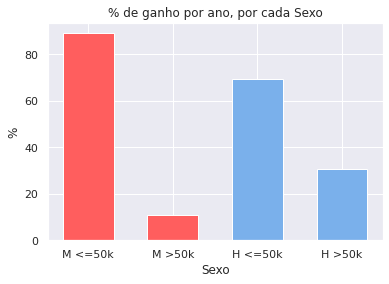

<Figure size 1080x432 with 0 Axes>

In [0]:
#Definindo a quantidade de barras 
left = [1, 2, 3, 4]

#Definindo as alturas de cada barra
height = [porcentagem_mulheres_menor, porcentagem_mulheres_maior, porcentagem_homens_menor, porcentagem_homens_maior] 
  
#Legenda de Cada barra
tick_label = ['M <=50k', 'M >50k', 'H <=50k', 'H >50k'] 
  
#Plotando o gráfico
plt.bar(left, height, tick_label = tick_label, 
        width = 0.6, color = ['#ff5e5e', '#ff5e5e','#7ab0eb','#7ab0eb']) 
#Nomeando o eixo X 
plt.xlabel('Sexo') 
#Nomeando o eixo Y
plt.ylabel('%') 
#Nomeando o Titulo
plt.title('% de ganho por ano, por cada Sexo') 
plt.figure(figsize=(15,6))
#Mostrando o gráfico
plt.show() 

Então observando o gráfico acima, vemos que existe uma certa diferença. Pois a porcentagem do Homem de ganhar mais de 50K por ano é maior do que a da mulher. É evidente de que muitas outras razões pode ter interferido nessa analise, mas já é mostra sim um certo indicio que o homem, em geral, ganha mais do que a mulher.

## 2ª Questão: Qual o impacto da escolaridade com o ganho. Pessoas que ganham mais de 50 mil dolares por ano, possuem escolaridade superior?

A busca por entrar em uma universidade está muito ligado a questões financeiras, especialmente em nosso país, será que isso também acontece no nosso dataframe, e em um outro país??
<br><br>Vamos descobrir!

Primeiro separamos as pessoas que ganham mais que 50K por ano.

In [0]:
mascara_maior_50 = (data[" -"] == " >50K") #Crio a mascara
data_maior = data.loc[mascara_maior_50, ["Education"]] #crio o dataframe
data_maior

,Education
7,HS-grad
8,Masters
9,Bachelors
10,Some-college
11,Bachelors
...,...
32539,Doctorate
32545,Assoc-acdm
32554,Masters
32557,HS-grad


Dessa maneira, conseguimos em um novo dataframe, todas as pessoas que ganham mais que 50K, como podemos perceber chamamos ela de data_maior


```
data_maior
```
Se fizermos um gráfico desse dataframe, colocando os niveis de escolaridades, e as ocorrências de cada nível, teremos algo assim:


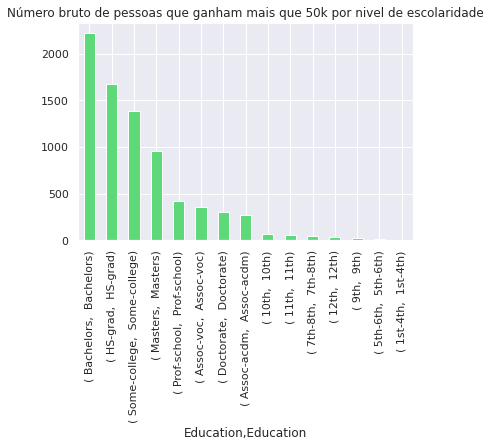

In [0]:
#A linha abaixo pode parecer complexa mas não é tanto assim. 
#Primeiro eu agrupo usando o groupby.
#Após isso eu seleciono a coluna, que será o proprio Education.
#Depois eu conto os valores da coluna selecionada. --> .value_counts()
#Eu seleciono para ficar em ordem decrescente. --> .sort_values(ascending=False)
#dentro do plot, eu defino o tipo do gráfico, o titulo e a cor.
data_maior.groupby(['Education'])['Education'].value_counts().sort_values(ascending=False).plot(kind='bar', title = 'Número bruto de pessoas que ganham mais que 50k por nivel de escolaridade', color='#5dd97a')

O problema desse gráfico é que ele ignora as proporções, como Bachelors tem mais dados, nos dará a falsa impressão de que quem chega no Bachelors irá ganhar mais de que qualquer outro nivel de Escolaridade.
<br><br> Dessa maneira, o que iremos fazer é deixar tudo em porcentagem, e assim conseguirmos enxergar melhor cada coluna.

In [0]:
#Calculo da porcentagem
np.porcentagem_mais = (data_maior["Education"].value_counts() * 100) / data["Education"].value_counts()
np.porcentagem_mais.sort_values(ascending=False)

 Doctorate       74.092010
 Prof-school     73.437500
 Masters         55.658735
 Bachelors       41.475257
 Assoc-voc       26.121563
 Assoc-acdm      24.835989
 Some-college    19.023454
 HS-grad         15.950862
 12th             7.621247
 10th             6.645230
 7th-8th          6.191950
 9th              5.252918
 11th             5.106383
 5th-6th          4.804805
 1st-4th          3.571429
 Preschool             NaN
Name: Education, dtype: float64

Agora, todos estão em porcentagem, conseguimos montar esse gráfico:

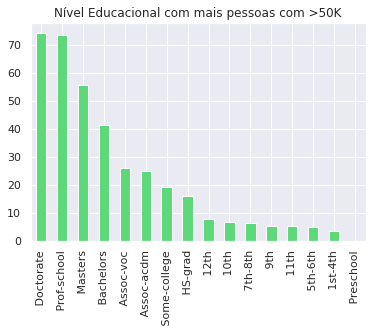

In [0]:
#Plotagem do gráfico
np.porcentagem_mais.sort_values(ascending=False).plot(kind='bar', title='Nível Educacional com mais pessoas com >50K', color='#5dd97a')

Agora sim temos algo que se assemelha mais com a realidade, onde constatamos que mais de 70% das pessoas com Doutorados ganham mais de 50K por ano.
<br><br>Agora iremos fazer o mesmo procedimento só que com as pessoas que ganham <=50K 

In [0]:
#Criação do dataframe e calculo da porcentagem
mascara_menor_50 = (data[" -"] == " <=50K")
data_menor = data.loc[mascara_menor_50, ["Education"]]
np.porcentagem_data_menor = (data_menor["Education"].value_counts() * 100) / data["Education"].value_counts()

Temos primeiramente o gráfico com o número de ocorrências bruto.

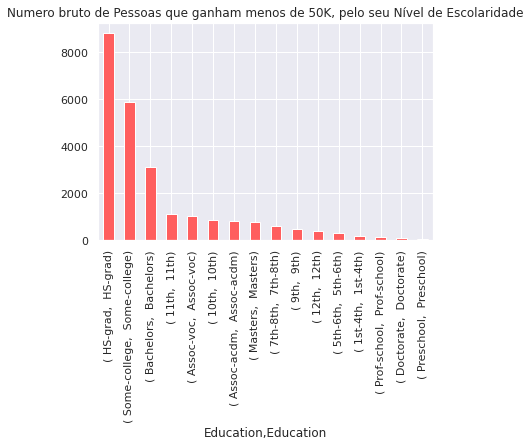

In [0]:
#Plotagem do gráfico
title="Numero bruto de Pessoas que ganham menos de 50K, pelo seu Nível de Escolaridade"
data_menor.groupby(['Education'])['Education'].value_counts().sort_values(ascending=False).plot(kind='bar', color='#ff5e5e', title = title)

E o gráfico com as porcentagens:

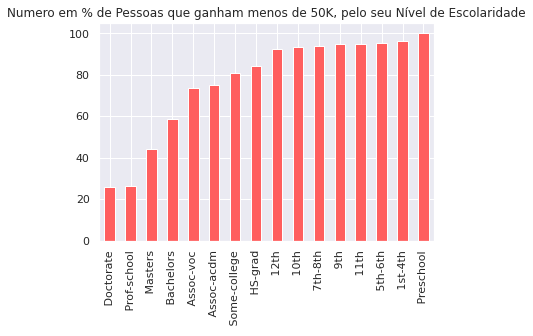

In [0]:
#Plotagem do gráfico.
title="Numero em % de Pessoas que ganham menos de 50K, pelo seu Nível de Escolaridade"
np.porcentagem_data_menor.sort_values(ascending=True).plot(kind='bar', color='#ff5e5e', title=title)

Observe-se que esse gráfico é como se fosse o oposto do gráfico que analisamos das pessoas que ganhavam mais de 50K.
<br><br>
E tirando como conclusão, conseguimos ver que pessoas que estudam mais, ou seja, chegam ao doutorado, mestrado conseguem obter uma rendar por ano maior. A surpresa da analise é o Prof-school, que quase obteve melhor proporção do que o doutorado.

## 3ª Questão: Qual é a relação entre a IDADE e o GANHO.

Pra começarmos nossa analise veremos qual é a idade minima presente nos nossos dados.

In [0]:
data.Age.min()

17

Agora, veremos qual a idade máxima.

In [0]:
data.Age.max()

90

WOW, temos uma diferença de 73 anos da idade minima para a máxima. Vamos ver a média.

In [0]:
data.Age.mean()

38.58164675532078

Temos uma média de 38. Vamos ver mais informações com o desribe.

In [0]:
data.Age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

Com o describe, descobrimos que a mediana do nosso conjunto de dados é 37. Para conseguirmos entender melhor essa visão, vamos construir um gráfico para mostrar a quantidade de pessoas que possuem idades entre:

*   17~27
*   28~38
*   39~49
*   50~60
*   61~90



In [0]:
#Iremos constuir o gráfico da seguinte maneira.
#Primeiro irei criar varios dataframes com as idades nos intervalos definidos.
df1 = data.loc[((data.Age>=17)&(data.Age<=27)), ["Age"," -"]]
df2 = data.loc[((data.Age>=28)&(data.Age<=38)), ["Age"," -"]]
df3 = data.loc[((data.Age>=39)&(data.Age<=49)), ["Age"," -"]]
df4 = data.loc[((data.Age>=50)&(data.Age<=60)), ["Age"," -"]]
df5 = data.loc[((data.Age>=61)&(data.Age<=90)), ["Age"," -"]]
#Vamos verificar, se não deixamos ninguem para trás, ou se pegamos dados a mais,
#Com isso o print a seguir deve apresentar o numero: 32561 (esse é o numero de entradas do nosso dataframe)
print(df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0])

32561


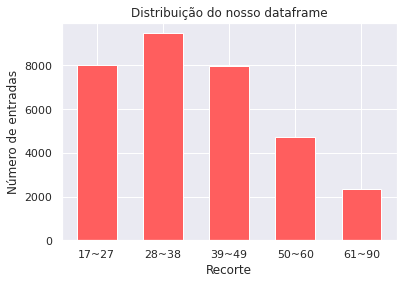

<Figure size 1080x432 with 0 Axes>

In [0]:
#Agora, vamos plotar o Gráfico com os df que temos.
#Definindo a quantidade de barras, no nosso caso é 5
left = [1, 2, 3, 4, 5]

#Definindo as alturas de cada barra, que no nosso caso é a qtd de linhas de cada
#dataframe
height = [df1.shape[0], df2.shape[0], df3.shape[0], df4.shape[0], df5.shape[0]] 
  
#Legendando cada barra
tick_label = ['17~27', '28~38', '39~49','50~60' ,'61~90'] 
  
#Plotando o gráfico
plt.bar(left, height, tick_label = tick_label, 
        width = 0.6, color = ['#ff5e5e']) 
#Nomeando o eixo X 
plt.xlabel('Recorte') 
#Nomeando o eixo Y
plt.ylabel('Número de entradas') 
#Nomeando o Titulo
plt.title('Distribuição do nosso dataframe') 
plt.figure(figsize=(15,6))
#Mostrando o gráfico
plt.show() 

Criando o gráfico conseguimos entender do porquê da mediana ter dado 37, conseguimos enxergar que a nossa distribuição está a esquerda.
<br> Agora utilizando o mesmo recorte, vamos ver quantos ganham mais que 50K por ano, e quantos ganham menos que 50K.

In [0]:
#Aqui iremos criar os recortes de todos que possuem mais que 50K
r1maior50 = df1.loc[(df1[" -"] == " >50K"), ["Age"," -"]]
r2maior50 = df2.loc[(df2[" -"] == " >50K"), ["Age"," -"]]
r3maior50 = df3.loc[(df3[" -"] == " >50K"), ["Age"," -"]]
r4maior50 = df4.loc[(df4[" -"] == " >50K"), ["Age"," -"]]
r5maior50 = df5.loc[(df5[" -"] == " >50K"), ["Age"," -"]]
recorte_maior = np.array((r1maior50.shape[0] , r2maior50.shape[0] , r3maior50.shape[0] , r4maior50.shape[0] , r5maior50.shape[0]))
#Aqui iremos criar os recortes de todos que possuem menos que 50K
r1menor50 = df1.loc[(df1[" -"] == " <=50K"), ["Age"," -"]]
r2menor50 = df2.loc[(df2[" -"] == " <=50K"), ["Age"," -"]]
r3menor50 = df3.loc[(df3[" -"] == " <=50K"), ["Age"," -"]]
r4menor50 = df4.loc[(df4[" -"] == " <=50K"), ["Age"," -"]]
r5menor50 = df5.loc[(df5[" -"] == " <=50K"), ["Age"," -"]]
recorte_menor = np.array((r1menor50.shape[0] , r2menor50.shape[0] , r3menor50.shape[0] , r4menor50.shape[0] , r5menor50.shape[0]))

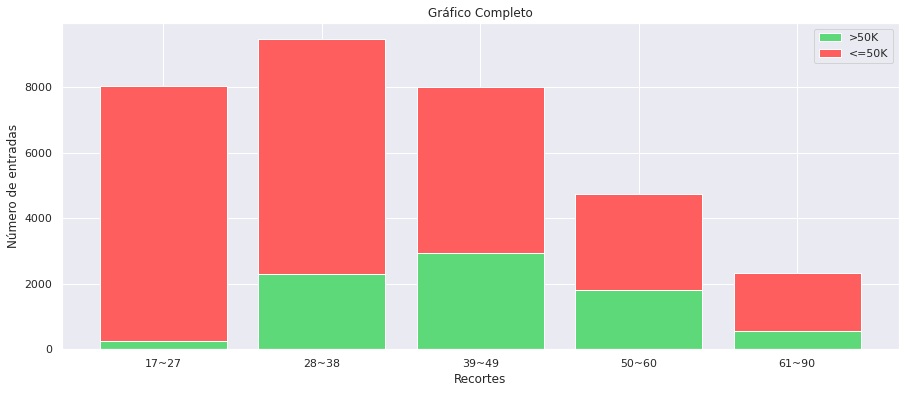

In [0]:
#Criando as legendas
legenda_recortes = ['17~27', '28~38', '39~49','50~60' ,'61~90']
#Definindo o tamanho
plt.figure(figsize=(15,6))
#Criando as barras
plt.bar(legenda_recortes,recorte_maior, color='#5dd97a')
plt.bar(legenda_recortes,recorte_menor, color='#ff5e5e', bottom = recorte_maior)
#Legendando o eixo X
plt.xlabel('Recortes')
#Legendando o eixo Y
plt.ylabel('Número de entradas')
#Legendando o titulo
plt.title('Gráfico Completo')
#Criando a Legenda
plt.legend(('>50K','<=50K'))
#Exibindo o gráfico
plt.show()

Bem com esse gráfico conseguimos ver que a maioria de quem recebe mais de 50K está localizado na idade de 39 a 49 anos.
<br>Veja mais detalhes no print a seguir.

In [0]:
print('Existem ', r1maior50.shape[0],' pessoas da idade de 17~27 anos, que recebem mais de 50K por ano')
print('Existem ', r1menor50.shape[0],' pessoas da idade de 17~27 anos, que recebem menos de 50K por ano')
print()
print('Existem ', r2maior50.shape[0],' pessoas da idade de 28~38 anos, que recebem mais de 50K por ano')
print('Existem ', r2menor50.shape[0],' pessoas da idade de 28~38 anos, que recebem menos de 50K por ano')
print()
print('Existem ', r3maior50.shape[0],' pessoas da idade de 39~49 anos, que recebem mais de 50K por ano')
print('Existem ', r3menor50.shape[0],' pessoas da idade de 39~49 anos, que recebem menos de 50K por ano')
print()
print('Existem ', r4maior50.shape[0],' pessoas da idade de 50~60 anos, que recebem mais de 50K por ano')
print('Existem ', r4menor50.shape[0],' pessoas da idade de 50~60 anos, que recebem menos de 50K por ano')
print()
print('Existem ', r5maior50.shape[0],' pessoas da idade de 61~90 anos, que recebem mais de 50K por ano')
print('Existem ', r5menor50.shape[0],' pessoas da idade de 61~90 anos, que recebem menos de 50K por ano')

Existem  258  pessoas da idade de 17~27 anos, que recebem mais de 50K por ano
Existem  7773  pessoas da idade de 17~27 anos, que recebem menos de 50K por ano

Existem  2284  pessoas da idade de 28~38 anos, que recebem mais de 50K por ano
Existem  7193  pessoas da idade de 28~38 anos, que recebem menos de 50K por ano

Existem  2940  pessoas da idade de 39~49 anos, que recebem mais de 50K por ano
Existem  5051  pessoas da idade de 39~49 anos, que recebem menos de 50K por ano

Existem  1808  pessoas da idade de 50~60 anos, que recebem mais de 50K por ano
Existem  2922  pessoas da idade de 50~60 anos, que recebem menos de 50K por ano

Existem  551  pessoas da idade de 61~90 anos, que recebem mais de 50K por ano
Existem  1781  pessoas da idade de 61~90 anos, que recebem menos de 50K por ano


Para finalizarmos, vamos ver a porcentagem em cada recorte de idade.

In [0]:
porcentagem_df1_maior = (r1maior50.shape[0]*100) / df1.shape[0]
porcentagem_df2_maior = (r2maior50.shape[0]*100) / df2.shape[0]
porcentagem_df3_maior = (r3maior50.shape[0]*100) / df3.shape[0]
porcentagem_df4_maior = (r4maior50.shape[0]*100) / df4.shape[0]
porcentagem_df5_maior = (r5maior50.shape[0]*100) / df5.shape[0]

In [0]:
porcentagem_df1_menor = (r1menor50.shape[0]*100) / df1.shape[0]
porcentagem_df2_menor = (r2menor50.shape[0]*100) / df2.shape[0]
porcentagem_df3_menor = (r3menor50.shape[0]*100) / df3.shape[0]
porcentagem_df4_menor = (r4menor50.shape[0]*100) / df4.shape[0]
porcentagem_df5_menor = (r5menor50.shape[0]*100) / df5.shape[0]

In [0]:
print('Finalizando: ')
print()
print('Das pessoas entre 17~27 anos:')
print(round(porcentagem_df1_maior,2),'% recebem mais de 50K por ano')
print(round(porcentagem_df1_menor,2),'% recebem menos de 50K por ano')
print()
print('Das pessoas entre 28~38 anos:')
print(round(porcentagem_df2_maior,2),'% recebem mais de 50K por ano')
print(round(porcentagem_df2_menor,2),'% recebem menos de 50K por ano')
print()
print('Das pessoas entre 39~49 anos:')
print(round(porcentagem_df3_maior,2),'% recebem mais de 50K por ano')
print(round(porcentagem_df3_menor,2),'% recebem menos de 50K por ano')
print()
print('Das pessoas entre 50~60 anos:')
print(round(porcentagem_df4_maior,2),'% recebem mais de 50K por ano')
print(round(porcentagem_df4_menor,2),'% recebem menos de 50K por ano')
print()
print('Das pessoas entre 61~90 anos:')
print(round(porcentagem_df5_maior,2),'% recebem mais de 50K por ano')
print(round(porcentagem_df5_menor,2),'% recebem menos de 50K por ano')

Finalizando: 

Das pessoas entre 17~27 anos:
3.21 % recebem mais de 50K por ano
96.79 % recebem menos de 50K por ano

Das pessoas entre 28~38 anos:
24.1 % recebem mais de 50K por ano
75.9 % recebem menos de 50K por ano

Das pessoas entre 39~49 anos:
36.79 % recebem mais de 50K por ano
63.21 % recebem menos de 50K por ano

Das pessoas entre 50~60 anos:
38.22 % recebem mais de 50K por ano
61.78 % recebem menos de 50K por ano

Das pessoas entre 61~90 anos:
23.63 % recebem mais de 50K por ano
76.37 % recebem menos de 50K por ano


Ótimo, conseguimos ver que pessoas com idade de 50-60 anos, tem uma porcentagem de receberem mais. Porém em números brutos, é entre 39-49.

Então concluindo essa 3ª questão, o que podemos analisar, é que muitas pessoas chegam no seu ápice em ganho anual com 39~60 anos, e parece que isso vai decaindo com o tempo. Isso pode estar relacionado com as políticas de aposentadoria de um país, ou de determinado **boom** financeiro de uma geração. Muitos fatores podem estar influenciando esses índices, seria necessário uma análise mais aprofundada para termos resultados mais precisos, com pesquisas mais complexas.

# Bibliografia

* [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult)
* [Pesquisa do IBGE mostra que mulher ganha menos em todas as ocupações](https://agenciabrasil.ebc.com.br/geral/noticia/2019-03/pesquisa-do-ibge-mostra-que-mulher-ganha-menos-em-todas-ocupacoes)
* [Mulheres ainda ganham 20,5% a menos do que homens, diz IBGE](https://noticias.r7.com/economia/mulheres-ainda-ganham-205-a-menos-do-que-homens-diz-ibge-08032019)
* [Mesmo com maior grau de escolaridade, mulheres ganham menos que homens](https://www.catho.com.br/carreira-sucesso/colunistas/noticias/mesmo-com-maior-grau-de-escolaridade-mulheres-ganham-menos-que-homens/)
* [EUA: diferença salarial entre homens e mulheres só deve desaparecer em 135 anos](https://agenciabrasil.ebc.com.br/direitos-humanos/noticia/2017-03/eua-diferenca-salarial-entre-homens-e-mulheres-so-deve-desaparecer)
* [Pesquisa revela motivações e barreiras para entrar na faculdade](https://guiadoestudante.abril.com.br/orientacao-profissional/pesquisa-revela-motivacoes-e-barreiras-para-entrar-na-faculdade/)
* [Plotagem de Gráfico 1](https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/)
* [Plotagem de Gráfico 2](https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351)